### 1. Importing packages

In [ ]:
# text data preprocessing
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import warnings
warnings.filterwarnings(action='ignore')

# text data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns

### 2. Loading dataset

In [ ]:
# tweets about TSLA from 1/1/2020 to 1/1/2021
tweets_df = pd.read_csv('tsla-tweets.csv').drop(['Unnamed: 0'], axis=1)
tweets_df.head()

,id,date,tweet,retweets_count
0,1212450794705969152,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2
1,1212450579634626560,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0
2,1212450337543602177,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0
3,1212450309131227141,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15
4,1212449703318753280,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0


In [ ]:
# converting date column into datetime type
tweets_df.date = pd.to_datetime(tweets_df.date)

### 3. Cleaning tweets

In [ ]:
def clean(df):
    # adding whitespace to end of every tweet
    df['cleaned_tweet'] = df.tweet.map(lambda x: x + ' ')
    # removing http links
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: re.sub(r'http.*', '', x))
    # removing special characters and numbers
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: re.sub(r'[^a-zA-Z#]', ' ', x))
    # lowercasing tweets
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.lower())
    # tokenizing tweets and removing stop words (words which don't add much meaning to sentence)
    stopword_list = stopwords.words('english')
    for i in range(len(df.cleaned_tweet)):
        tokens = word_tokenize(df.cleaned_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        df.cleaned_tweet[i] = clean_tokens

In [ ]:
nltk.download('punkt')

In [ ]:
clean(tweets_df)
tweets_df.head()

,id,date,tweet,retweets_count,cleaned_tweet
0,1212450794705969152,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2,"[fun, fact, audi, registered, e, tron, netherl..."
1,1212450579634626560,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0,"[mf, tsla, stock, watch, shit, go, damn, year,..."
2,1212450337543602177,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0,"[icannot, enough, june, th, within, days, tsla..."
3,1212450309131227141,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15,"[tesla, gaining, momentum, taiwan, teslaowners..."
4,1212449703318753280,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0,"[schuldensuehner, extrapolate, numbers, anothe..."


In [ ]:
tweets_df.tweet[0]

"Fun fact: Audi registered more E-Tron's in the Netherlands in 19Q4 than Tesla SuX (combined) in 18Q4 (and obviously orders of magnitudes more than Tesla in 19Q4).  $TSLAQ $TSLA"

In [ ]:
tweets_df.cleaned_tweet[0]

['fun',
 'fact',
 'audi',
 'registered',
 'e',
 'tron',
 'netherlands',
 'q',
 'tesla',
 'sux',
 'combined',
 'q',
 'obviously',
 'orders',
 'magnitudes',
 'tesla',
 'q',
 'tslaq',
 'tsla']

### 4. Lemmatizing cleaned tweets

In [ ]:
# lemmatization: grouping together inflected forms of word, e.g. watched -> watch
def lemmatize(tweets):
    for i in range(len(tweets)):
        # pos-tagging each word in tweet
        for w in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(w)
        # converting pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        # lemmatizing each word in tweet
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

In [ ]:
lemmatize(tweets_df.cleaned_tweet)
tweets_df.head()

,id,date,tweet,retweets_count,cleaned_tweet
0,1212450794705969152,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2,fun fact audi register e tron netherlands q te...
1,1212450579634626560,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0,mf tsla stock watch shit go damn year miss curve
2,1212450337543602177,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0,icannot enough june th within day tsla low rep...
3,1212450309131227141,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15,tesla gain momentum taiwan teslaownerstwn tsla...
4,1212449703318753280,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0,schuldensuehner extrapolate number another two...


In [ ]:
# removing 'tesla, 'tsla', 'q', and '#'
def final_clean(df):
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('tesla', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('tsla', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('q', ''))
    df.cleaned_tweet = df.cleaned_tweet.map(lambda x: x.replace('#', ''))

In [ ]:
final_clean(tweets_df)

In [ ]:
tweets_df.cleaned_tweet[0]

'fun fact audi register e tron netherlands   sux combine  obviously order magnitude    '

In [ ]:
# joining all tweets into single string
all_words_str = ' '.join([tweet for tweet in tweets_df.cleaned_tweet])

# making list of all words
all_words_list = all_words_str.split()

### 5. Frequency analysis

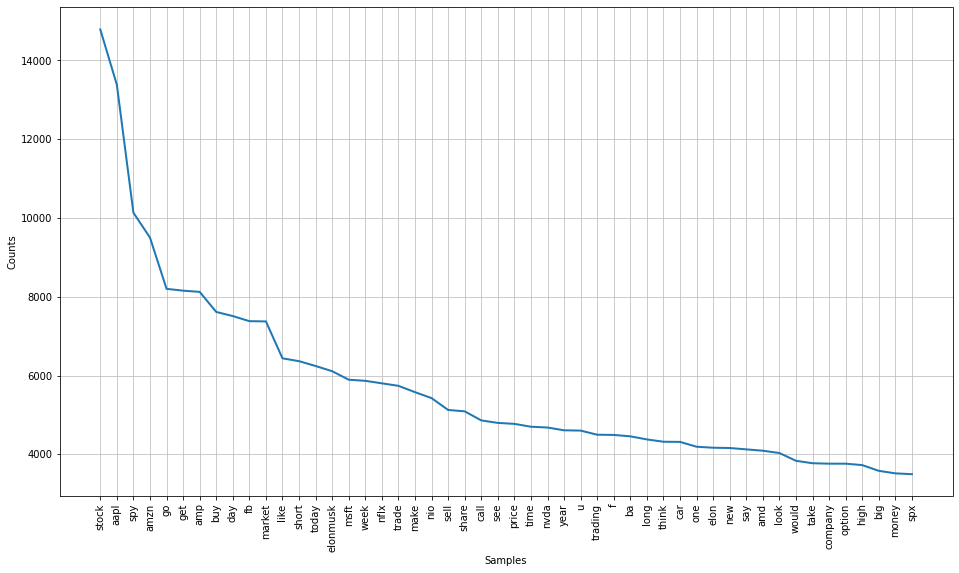

In [ ]:
# plotting word frequency distribution of 50 most used words
plt.figure(figsize=(16,9))
plt.xticks(fontsize=10, rotation=90)
word_freq = nltk.FreqDist(all_words_list)
word_freq.plot(50, cumulative=False)

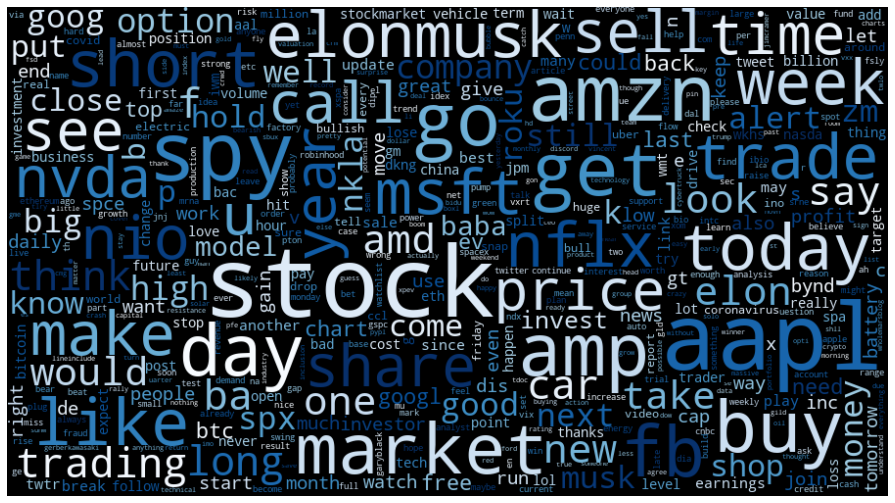

In [ ]:
# word cloud with word frequencies
word_cloud = WordCloud(width=900,
                       height=500,
                       max_words=500,
                       max_font_size=100,
                       relative_scaling=0.5,
                       colormap='Blues',
                       normalize_plurals=True).generate_from_frequencies(word_freq)
plt.figure(figsize=(16,9))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# showing frequency of each word
word_freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
word_freq_df.head(10)

,Word,Count
13,stock,14789
126,aapl,13384
301,spy,10135
129,amzn,9504
16,go,8202
66,get,8155
43,amp,8125
408,buy,7615
26,day,7510
1009,fb,7381


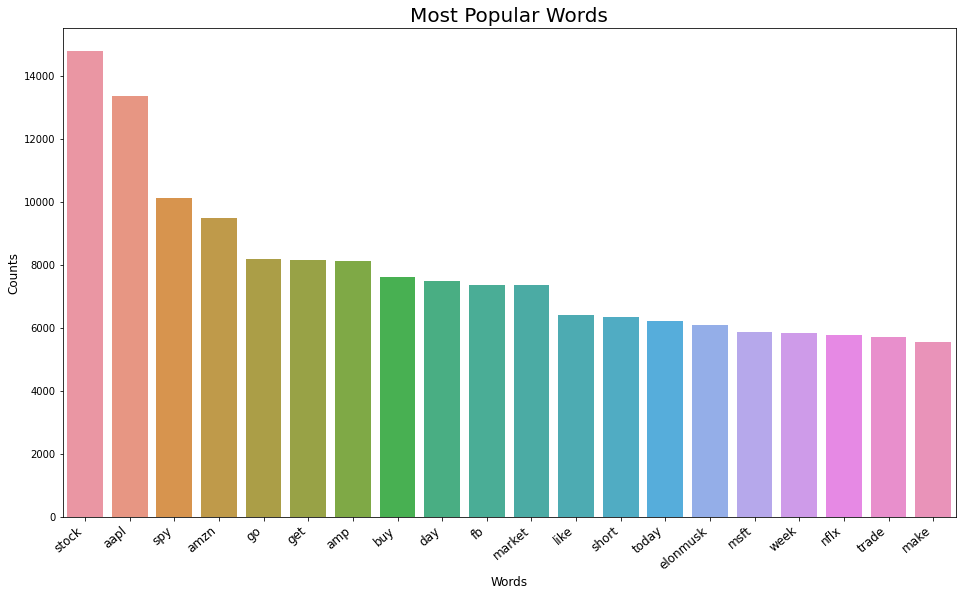

In [ ]:
# plotting bar plot of most frequent words
word_freq_df = word_freq_df.nlargest(columns='Count', n=20)
plt.figure(figsize=(16,9))
ax = sns.barplot(data=word_freq_df, x='Word', y='Count')
ax.set_ylabel('Counts', fontsize=12)
ax.set_xlabel('Words', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
ax.set_title('Most Popular Words', fontsize=20)
plt.show()

### 6. Saving cleaned tweets

In [ ]:
tweets_df.to_csv('cleaned-tsla-tweets.csv', index=False)